## Feature Scaling

With any distance based machine learning model (regularized regression methods, neural networks, and now kmeans), you will want to scale your data.  

If you have some features that are on completely different scales, this can greatly impact the clusters you get when using K-Means. 

In this notebook, you will get to see this first hand.  To begin, let's read in the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing as p

import helpers2 as h
import tests as t

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

In [3]:
h.simulate_data?

Signature: h.simulate_data(n=500, features=10, centroids=3)
Docstring:
Simulates n data points, each with number of features equal to features, with a number of centers equal to centroids
INPUT (defaults)
    n = number of rows (500)
    features = number of columns (10)
    centroids = number of centers (3)
Output
    dataset = a dataset with the the specified characteristics
File:      c:\users\ongch\apps\ml\udacity\ml_tf\04_unsupervised_learning\helpers2.py
Type:      function


In [4]:
# create dataset for notebook
data = h.simulate_data(200, 2 , 4)
df = pd.DataFrame(data)
df.columns = ['height', 'weight']

df['height'] = np.abs(df['height'] * 100)
df['weight'] = df['weight'] + np.random.normal(50, 10, 200)

Next, take a look at the data to get familiar with it.  The dataset has two columns, and it is stored in the **df** variable.  It might be useful to get an idea of the spread in the current data, as well as a visual of the points.  

In [5]:
# get some stats to see the spread
print('Stats for the dataset:\n', df.describe())

Stats for the dataset:
             height      weight
count   200.000000  200.000000
mean    569.726207   52.997797
std     246.966215   11.560179
min      92.998481   27.989025
25%     357.542793   44.880392
50%     545.766752   52.772767
75%     773.310607   62.008542
max    1096.222348   80.887107


Text(0, 0.5, 'Height (cm)')

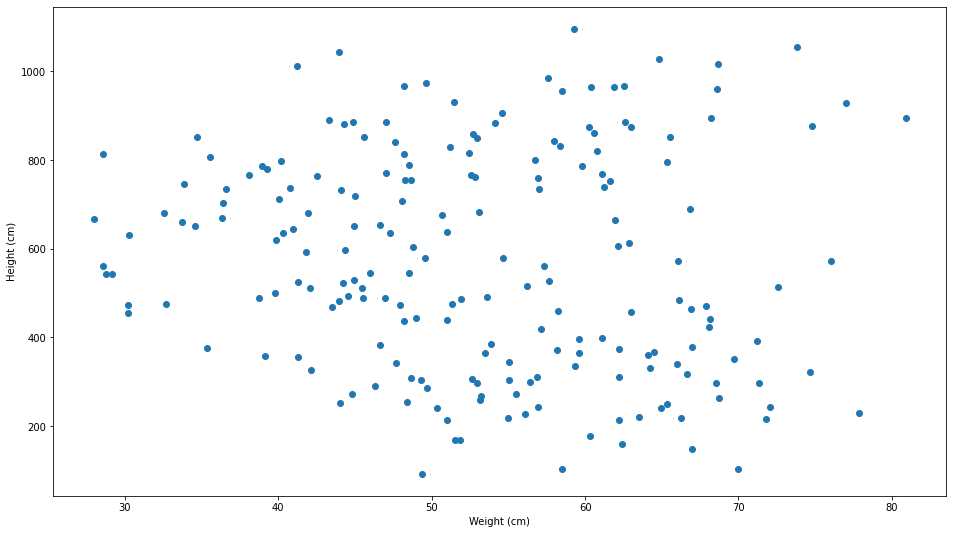

In [10]:
# visualize the spread
fig, ax = plt.subplots()
ax.scatter(df['weight'], df['height'])
ax.set_xlabel('Weight (cm)')
ax.set_ylabel('Height (cm)')

Now that we've got a dataset, let's look at some options for scaling the data.  As well as how the data might be scaled.  There are two very common types of feature scaling that we should discuss:


**I.  MinMaxScaler**

In some cases it is useful to think of your data in terms of the percent they are as compared to the maximum value.  In these cases, you will want to use **MinMaxScaler**.

**II. StandardScaler**

Another very popular type of scaling is to scale data so that it has mean 0 and variance 1.  In these cases, you will want to use **StandardScaler**.  

It is probably more appropriate with this data to use **StandardScaler**.  However, to get practice with feature scaling methods in python, we will perform both.

First let's fit the **StandardScaler** transformation to this dataset.  I will do this one so you can see how to apply preprocessing in sklearn.

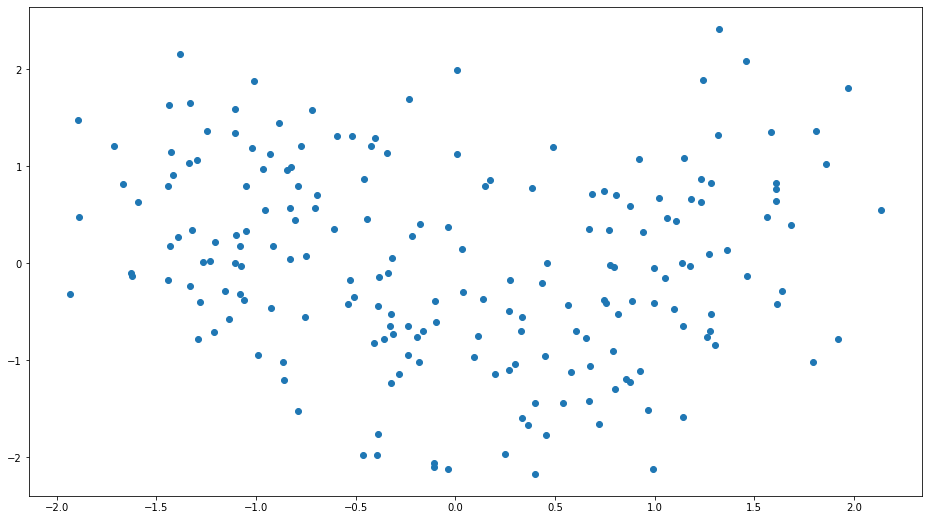

In [7]:
df_ss = p.StandardScaler().fit_transform(df) # returns an array
df_ss = pd.DataFrame(df_ss)
df_ss.columns = ['weight', 'height']

plt.scatter(df_ss['weight'], df_ss['height'])

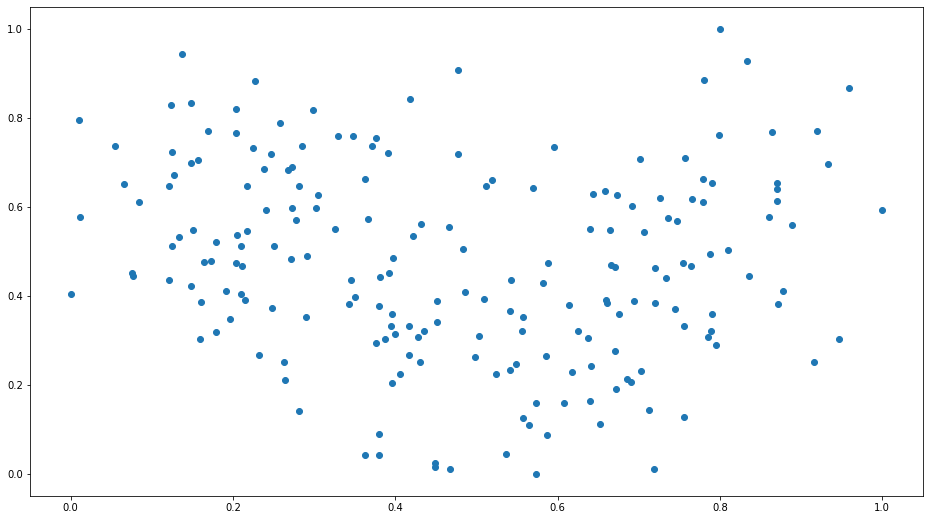

In [8]:
df_mm = p.MinMaxScaler().fit_transform(df)
df_mm = pd.DataFrame(df_mm)
df_mm.columns = ['weight', 'height']

plt.scatter(df_mm['weight'], df_mm['height'])

Now let's take a look at how kmeans divides the dataset into different groups for each of the different scalings of the data.  Did you end up with different clusters when the data was scaled differently?

Text(0, 0.5, 'Height')

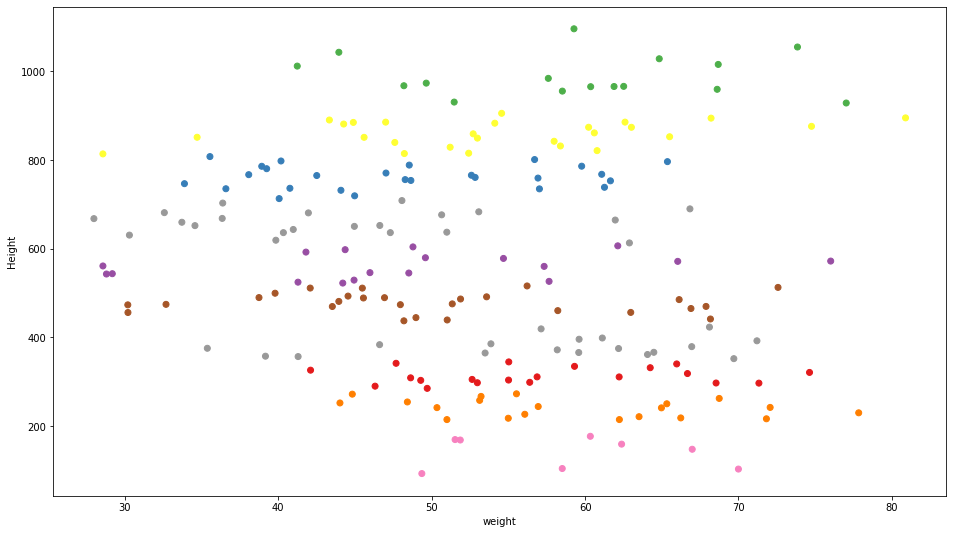

In [27]:
def fit_kmeans(data, centers):
    '''
    INPUT:
        data = the dataset you would like to fit kmeans to (dataframe)
        centers = the number of centroids (int)
    OUTPUT:
        labels - the labels for each datapoint to which group it belongs (nparray)
    '''
    kmeans = KMeans(centers)
    labels = kmeans.fit_predict(data)
    return labels

labels = fit_kmeans(df, 10)

plt.scatter(df['weight'], df['height'], c=labels, cmap='Set1')
plt.xlabel('weight')
plt.ylabel('Height')

Text(0, 0.5, 'Standardised Height')

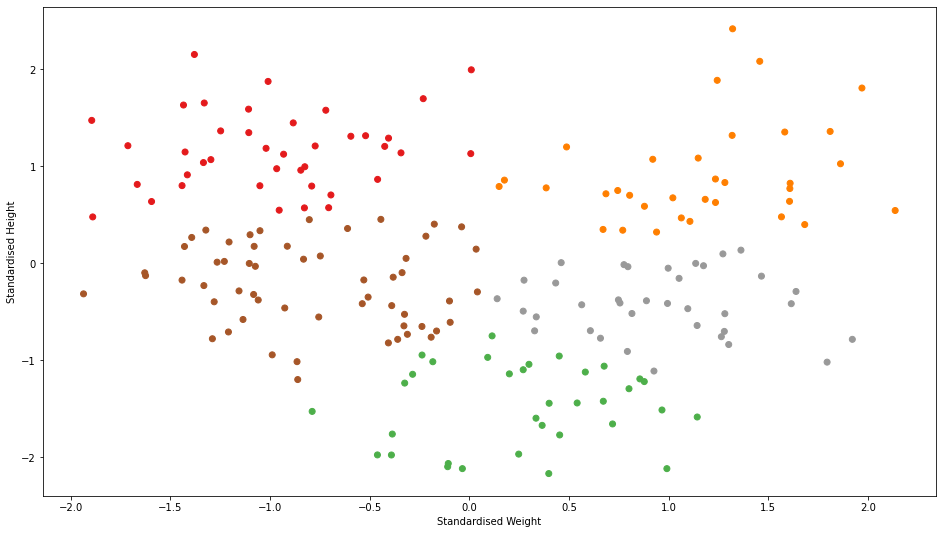

In [18]:
labels_ss = fit_kmeans(df_ss, 5)
plt.scatter(df_ss['weight'], df_ss['height'], c=labels_ss, cmap='Set1')
plt.xlabel('Standardised Weight')
plt.ylabel('Standardised Height')

Text(0, 0.5, 'Min Max Scaled Height')

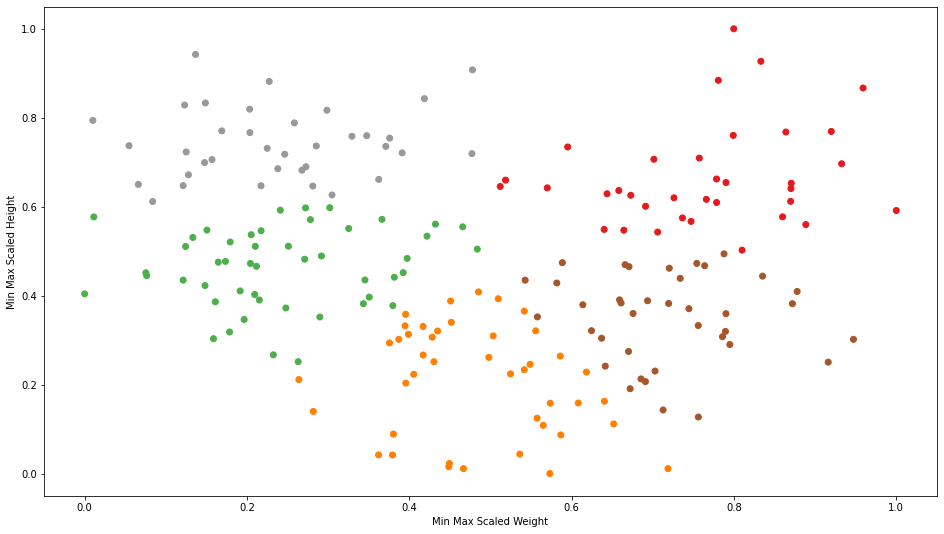

In [23]:
labels_mm = fit_kmeans(df_mm, 5)
plt.scatter(df_mm['weight'], df_mm['height'], c=labels_mm, cmap='Set1')
plt.xlabel('Min Max Scaled Weight')
plt.ylabel('Min Max Scaled Height')

The are different clusters that formed with dataset scaled differently. But the scaled datasets resembled each other more closely and visually looked like the clustering is working.